In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Exploratory Data Analysis

In [125]:
df_imdb =pd.read_csv("imdb_top_1000.csv")

Basic DataFrame Exploration

In [126]:
df_imdb.shape

(1000, 16)

In [127]:
df_imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Observasions:
columns Poster_Link,Series_Title,Released_Year and Overview may dropped as it is not giving any insights 
to the analysis for prediction of IMBD Rating for any movie.
label column is IMDB Rating

In [128]:
df_imdb.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

The data set is a mix of numerical and categorical columns, but runtime and gross are described as categorical.
It needs to be changed to numerical

In [129]:
df_imdb['Runtime'] = df_imdb['Runtime'].astype('str').str.replace('min','').astype('float')

In [130]:
df_imdb['Gross'] = df_imdb['Gross'].astype('str').str.replace(',','').astype('float')

In [131]:
df_imdb.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [132]:
df_imdb.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


Summary Statistics of Numeric Columns

In [133]:
df_imdb.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

there are missing rows in certificate,metascore and gross

In [134]:
df_imdb.isnull().sum()*100/len(df)

Poster_Link       0.0
Series_Title      0.0
Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Overview          0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

In [135]:
df_imdb.duplicated().sum()

0

In [136]:
Q1 = df_imdb.select_dtypes('number').quantile(0.25)
Q3 = df_imdb.select_dtypes('number').quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
potential_outliers = (df_imdb.select_dtypes('number') < lower_bound) | (df_imdb.select_dtypes('number') > upper_bound)
potential_outliers.sum()

Runtime        29
IMDB_Rating    13
Meta_score      7
No_of_Votes    67
Gross          89
dtype: int64

IMDB Rating, Metascores and no of votes may have outliers

Value Counts of Category columns

In [137]:
df_imdb.Certificate.value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [138]:
df_imdb.Genre.value_counts()

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

In [139]:
df_imdb.Director.value_counts()

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: Director, Length: 548, dtype: int64

In [140]:
df_imdb.Star1.value_counts()

Tom Hanks          12
Robert De Niro     11
Al Pacino          10
Clint Eastwood     10
Humphrey Bogart     9
                   ..
Preity Zinta        1
Javier Bardem       1
Ki-duk Kim          1
Vladimir Garin      1
Robert Donat        1
Name: Star1, Length: 660, dtype: int64

In [141]:
df_imdb.Star2.value_counts()

Emma Watson          7
Matt Damon           5
Kate Winslet         4
Ian McKellen         4
Chris Evans          4
                    ..
Viola Davis          1
Morena Baccarin      1
Shahab Hosseini      1
Simon Yam            1
Madeleine Carroll    1
Name: Star2, Length: 841, dtype: int64

In [142]:
df_imdb.Star3.value_counts()

Rupert Grint          5
Scarlett Johansson    4
Jennifer Connelly     4
Rachel McAdams        4
John Goodman          4
                     ..
Arifin Putra          1
Matthew Goode         1
Bradley Cooper        1
Gwilym Lee            1
Lucie Mannheim        1
Name: Star3, Length: 891, dtype: int64

In [143]:
df_imdb.Star4.value_counts()

Michael Caine        4
Mark Ruffalo         3
Catherine Keener     3
Julianne Moore       2
Donald Sutherland    2
                    ..
Paul Rudd            1
Derek Jacobi         1
Ed Skrein            1
Merila Zare'i        1
Godfrey Tearle       1
Name: Star4, Length: 939, dtype: int64

Data Visualisation

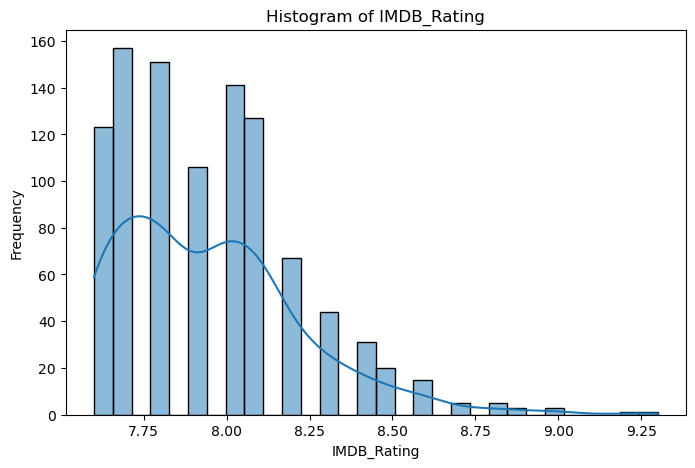

In [144]:
plt.figure(figsize=(8,5))
sns.histplot(df_imdb['IMDB_Rating'],bins=30,kde='True')
plt.title('Histogram of IMDB_Rating')
plt.xlabel('IMDB_Rating')
plt.ylabel('Frequency')
plt.show()

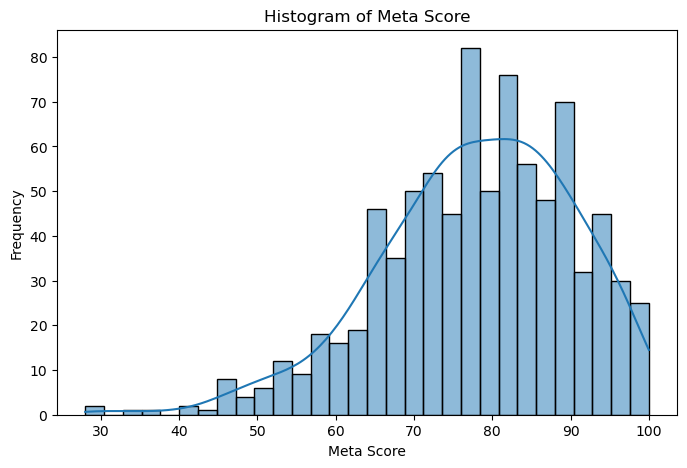

In [145]:
plt.figure(figsize=(8,5))
sns.histplot(df_imdb['Meta_score'],bins=30,kde='True')
plt.title('Histogram of Meta Score')
plt.xlabel('Meta Score')
plt.ylabel('Frequency')
plt.show()

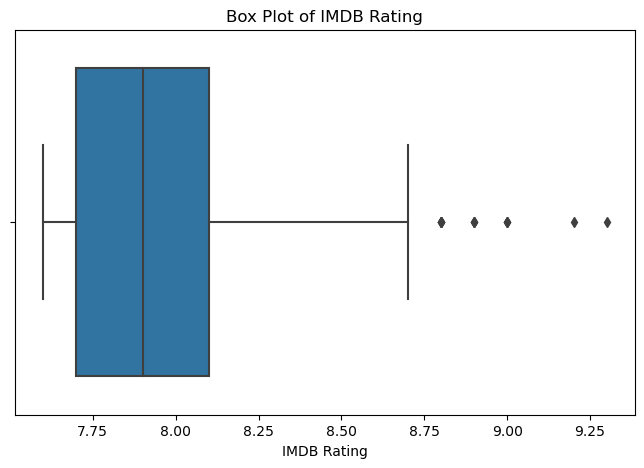

In [146]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_imdb['IMDB_Rating'])
plt.title('Box Plot of IMDB Rating')
plt.xlabel('IMDB Rating')
plt.show()

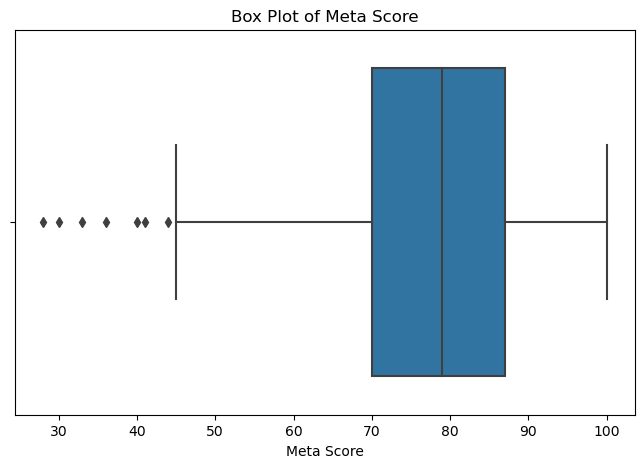

In [147]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_imdb['Meta_score'])
plt.title('Box Plot of Meta Score')
plt.xlabel('Meta Score')
plt.show()

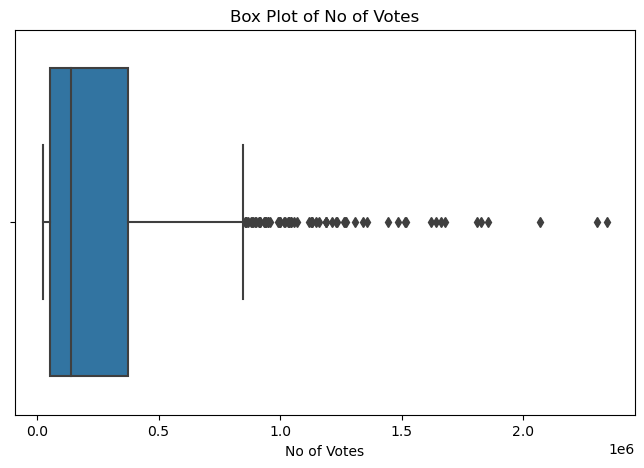

In [148]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_imdb['No_of_Votes'])
plt.title('Box Plot of No of Votes')
plt.xlabel('No of Votes')
plt.show()

## Data Preprocessing

remove columns - Poster_Link,Released Year, Overview

In [149]:

df_imdb=df_imdb.drop(columns=['Poster_Link','Released_Year','Overview'])

In [150]:
df_imdb.shape

(1000, 13)

remove rows with  missing values

In [151]:

df_imdb= df_imdb.dropna()

In [152]:
df_imdb.shape

(714, 13)

In [153]:
df_imdb_num= df_imdb.select_dtypes(include='number')
df_imdb_num.head()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,142.0,9.3,80.0,2343110,28341469.0
1,175.0,9.2,100.0,1620367,134966411.0
2,152.0,9.0,84.0,2303232,534858444.0
3,202.0,9.0,90.0,1129952,57300000.0
4,96.0,9.0,96.0,689845,4360000.0


In [154]:
Q1 = df_imdb_num.quantile(0.25)
Q3 = df_imdb_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [155]:
lower_bound

Runtime        5.662500e+01
IMDB_Rating    7.100000e+00
Meta_score     4.600000e+01
No_of_Votes   -5.216640e+05
Gross         -1.383026e+08
dtype: float64

In [156]:
upper_bound

Runtime        1.836250e+02
IMDB_Rating    8.700000e+00
Meta_score     1.100000e+02
No_of_Votes    1.125466e+06
Gross          2.469241e+08
dtype: float64

In [157]:
df_imdb = df_imdb[~((df_imdb_num < lower_bound) | (df_imdb_num > upper_bound)).any(axis=1)]

In [158]:
df_imdb.shape

(604, 13)

<Axes: xlabel='IMDB_Rating'>

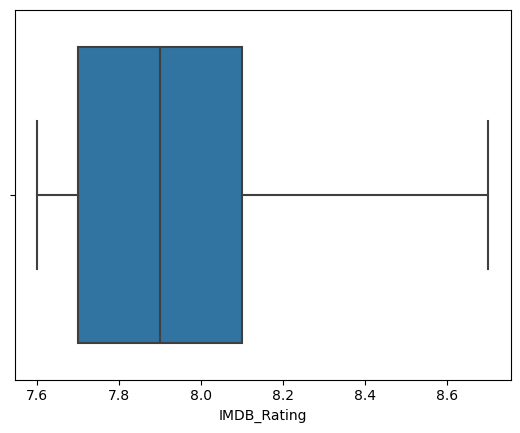

In [159]:
sns.boxplot(x=df_imdb['IMDB_Rating'])

In [160]:
X = df_imdb.drop('IMDB_Rating', axis=1)
y = df_imdb.IMDB_Rating
X.head()

,Series_Title,Certificate,Runtime,Genre,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
15,Goodfellas,A,146.0,"Biography, Crime, Drama",90.0,Martin Scorsese,Robert De Niro,Ray Liotta,Joe Pesci,Lorraine Bracco,1020727,46836394.0
17,One Flew Over the Cuckoo's Nest,A,133.0,Drama,83.0,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,918088,112000000.0
19,Gisaengchung,A,132.0,"Comedy, Drama, Thriller",96.0,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778,53367844.0
22,Cidade de Deus,A,130.0,"Crime, Drama",79.0,Fernando Meirelles,Kátia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,699256,7563397.0
23,Sen to Chihiro no kamikakushi,U,125.0,"Animation, Adventure, Family",96.0,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376,10055859.0


In [161]:
X_num=X.select_dtypes('number')

In [162]:
X_num.head()

,Runtime,Meta_score,No_of_Votes,Gross
15,146.0,90.0,1020727,46836394.0
17,133.0,83.0,918088,112000000.0
19,132.0,96.0,552778,53367844.0
22,130.0,79.0,699256,7563397.0
23,125.0,96.0,651376,10055859.0


In [163]:
X_cat=X.select_dtypes('object')
X_cat.head()

,Series_Title,Certificate,Genre,Director,Star1,Star2,Star3,Star4
15,Goodfellas,A,"Biography, Crime, Drama",Martin Scorsese,Robert De Niro,Ray Liotta,Joe Pesci,Lorraine Bracco
17,One Flew Over the Cuckoo's Nest,A,Drama,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco
19,Gisaengchung,A,"Comedy, Drama, Thriller",Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik
22,Cidade de Deus,A,"Crime, Drama",Fernando Meirelles,Kátia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele
23,Sen to Chihiro no kamikakushi,U,"Animation, Adventure, Family",Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi


In [164]:
scaler=MinMaxScaler()
X_num_scaled=scaler.fit_transform(X_num)

In [165]:
type(X_num_scaled)

numpy.ndarray

In [166]:
X_num_scaled=pd.DataFrame(X_num_scaled,columns=X_num.columns,index=X_num.index)

In [50]:
X_num_scaled.describe()

,Meta_score,No_of_Votes
count,671.000000,671.000000
mean,0.584837,0.256763
std,0.214855,0.237381
min,0.000000,0.000000
25%,0.444444,0.062258
50%,0.592593,0.181494
75%,0.740741,0.399361
max,1.000000,1.000000


In [167]:
X_cat_encoded=pd.get_dummies(X_cat,drop_first=False,dtype=int)

In [168]:
X=pd.concat([X_num_scaled,X_cat_encoded],axis=1)

In [169]:
X.shape, X_num_scaled.shape, X_cat_encoded.shape

((604, 3231), (604, 4), (604, 3227))

In [170]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Runtime                              0
Meta_score                           0
No_of_Votes                          0
Gross                                0
Series_Title_(500) Days of Summer    0
                                    ..
Star4_Yvonne Furneaux                0
Star4_Zac Mattoon O'Brien            0
Star4_Ziyi Zhang                     0
Star4_Zoë Kravitz                    0
Star4_Álvaro Guerrero                0
Length: 3231, dtype: int64
0
(604, 3231)
(604,)


In [171]:
X.describe()

,Runtime,Meta_score,No_of_Votes,Gross,Series_Title_(500) Days of Summer,Series_Title_12 Years a Slave,Series_Title_1917,Series_Title_2001: A Space Odyssey,Series_Title_21 Grams,Series_Title_25th Hour,...,Star4_Winona Ryder,Star4_Wolfgang Lukschy,Star4_Wotan Wilke Möhring,Star4_Xolani Mali,Star4_Yun Qu,Star4_Yvonne Furneaux,Star4_Zac Mattoon O'Brien,Star4_Ziyi Zhang,Star4_Zoë Kravitz,Star4_Álvaro Guerrero
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,...,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,0.432015,0.584253,0.242825,0.202568,0.001656,0.001656,0.001656,0.001656,0.001656,0.001656,...,0.001656,0.001656,0.001656,0.001656,0.001656,0.001656,0.001656,0.001656,0.001656,0.001656
std,0.193555,0.214918,0.228728,0.239555,0.040689,0.040689,0.040689,0.040689,0.040689,0.040689,...,0.040689,0.040689,0.040689,0.040689,0.040689,0.040689,0.040689,0.040689,0.040689,0.040689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279279,0.444444,0.061014,0.021526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.414414,0.592593,0.167597,0.107046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.540541,0.740741,0.373267,0.289029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(483, 3231)
(121, 3231)
(483,)
(121,)


In [175]:
X.to_csv('imdb_rating_features.csv', index=False)
y.to_csv('imdb_rating_label.csv',index=False)